# Westeros Tutorial - Introducing emissions (part2/2): Adding emission taxes

In the previous tutorial (``westeros_emissions_bounds.ipynb``), we showed how to introduce emissions into a stylized energy systems model, and what happens if you put a constraint on total CO2 emissions.

Now, we will tackle the complementary policy to emissions constraints, namely emissions taxes.

**Pre-requisites**
- You have the *MESSAGEix* framework installed and working
- You have run Westeros baseline scenario (``westeros_baseline.ipynb``) and solved it successfully
- You have run the tutorial on introducing emissions (``westeros_emissions_bounds.ipynb``)

In [1]:
import pandas as pd
import ixmp
import message_ix

from message_ix.util import make_df

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
mp = ixmp.Platform(name="default", jvmargs="-Duser.language=en")

In [3]:
model = "Westeros Electrified"
base = message_ix.Scenario(mp, model=model, scenario="baseline")

## Load the scenario with an emission bound and look at the result in more detail

In [4]:
scen_bd = message_ix.Scenario(mp, model=model, scenario="emission_bound")

In [5]:
# Emissions in MtCO2
emissions = scen_bd.var("EMISS", {"node": "Westeros"})
emissions

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:998: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "lvl"] = item.getLevels(jList)[:]
C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:999: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "mrg"] = item.getMarginals(jList)[:]


,node,emission,type_tec,year,lvl,mrg
0,Westeros,CO2,all,700,350.569757,0.0
1,Westeros,CO2,all,710,568.509836,0.0
2,Westeros,CO2,all,720,580.920407,0.0


In [6]:
# Price in USD/tCO2
emission_prices = scen_bd.var("PRICE_EMISSION")
emission_prices

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:998: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "lvl"] = item.getLevels(jList)[:]
C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:999: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "mrg"] = item.getMarginals(jList)[:]


,node,type_emission,type_tec,year,lvl,mrg
0,Westeros,GHG,all,700,11.571898,0.0
1,Westeros,GHG,all,710,18.849403,0.0
2,Westeros,GHG,all,720,30.703691,0.0


In [9]:
scen_bd.var_list

['OBJ',
 'EXT',
 'STOCK',
 'CAP_NEW',
 'CAP',
 'ACT',
 'EMISS',
 'LAND',
 'REL',
 'DEMAND',
 'PRICE_COMMODITY',
 'PRICE_EMISSION',
 'COST_NODAL',
 'COST_NODAL_NET',
 'GDP',
 'I',
 'C']

When setting a cumlulative bound, the undiscounted price of emission is the same in different model years (see the marginals of
equation `"EMISSION_CONSTRAINT"`). However, considering the year-to-year discount factor, we observe an ascending trend in
emission prices shown in `"PRICE_EMISSION"` above. This means the emission price in later years is higher as the value of money in
the future is lower compared to today. 

## Make a new scenario with emission bounds by year

In the previous example, we imposed a bound on emissions over the entire model horizon by using the `type_year` as 'cumulative'
in the parameter `"bound_emission"`. Now, we will create a similar scenario, but the emission constraint will be defined per year.

For the sake of comparison, the per-year emission values will be chosen exactly in line with the optimal emission trajectory
obtained from the solution of the previous scenario.

In [11]:
scen_bd_by_year = base.clone(
    model, "carbon_bound_by_year", "introducing a carbon tax", keep_solution=False
)
scen_bd_by_year.check_out()

In [12]:
scen_bd_by_year.add_set("emission", "CO2")
scen_bd_by_year.add_cat("emission", "GHG", "CO2")
scen_bd_by_year.add_par("emission_factor", scen_bd.par("emission_factor"))
scen_bd_by_year.par("emission_factor")

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:995: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "value"] = item.getValues(jList)[:]
C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:995: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "value"] = item.getValues(jList)[:]


,node_loc,technology,year_vtg,year_act,mode,emission,value,unit
0,Westeros,coal_ppl,690,700,standard,CO2,7.4,tCO2/kWa
1,Westeros,coal_ppl,690,710,standard,CO2,7.4,tCO2/kWa
2,Westeros,coal_ppl,690,720,standard,CO2,7.4,tCO2/kWa
3,Westeros,coal_ppl,700,700,standard,CO2,7.4,tCO2/kWa
4,Westeros,coal_ppl,700,710,standard,CO2,7.4,tCO2/kWa
5,Westeros,coal_ppl,700,720,standard,CO2,7.4,tCO2/kWa
6,Westeros,coal_ppl,710,710,standard,CO2,7.4,tCO2/kWa
7,Westeros,coal_ppl,710,720,standard,CO2,7.4,tCO2/kWa
8,Westeros,coal_ppl,720,720,standard,CO2,7.4,tCO2/kWa


We specify the model horizon and subsequently add an emission bound parameter to the model. Note that the key `value` here takes the values of the `lvl` column of the `emissions` dataframe printed some cells above.

In [13]:
horizon = [700, 710, 720]

bd_emission = make_df(
    "bound_emission",
    node="Westeros",
    type_year=horizon,
    type_tec="all",
    unit="MtCO2",
    type_emission="GHG",
    value=emissions.set_index("year").lvl,
)
scen_bd_by_year.add_par("bound_emission", bd_emission)
scen_bd_by_year.par("bound_emission")

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:995: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "value"] = item.getValues(jList)[:]


,node,type_emission,type_tec,type_year,value,unit
0,Westeros,GHG,all,700,350.569757,MtCO2
1,Westeros,GHG,all,710,568.509836,MtCO2
2,Westeros,GHG,all,720,580.920407,MtCO2


In [14]:
scen_bd_by_year.commit(comment="emission bound by year")

In [15]:
scen_bd_by_year.solve()

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:995: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "value"] = item.getValues(jList)[:]


In [17]:
scen_bd_by_year.var("OBJ")["lvl"]

206280.0625

In [20]:
scen_bd_by_year.var("PRICE_EMISSION")

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:998: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "lvl"] = item.getLevels(jList)[:]
C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:999: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "mrg"] = item.getMarginals(jList)[:]


,node,type_emission,type_tec,year,lvl,mrg
0,Westeros,GHG,all,720,42.541293,0.0


Comparing the emission prices between the two scenarios at this stage, we see that the values are not identical.
The reason is that when we introduce emission bounds per year, the price of emission in each year reflects the cost occuring
when reducing one more unit of emission in that year.
However, in the scenario with a cumulative bound over the entire model horizon, the price of emission reflects the cost of the
system in reducing one more unit of emission over the entire model horizon.

## Setting an emissions tax instead of a bound

Again, we choose the emissions prices from the first example (with a cumulative bound) as the tax level over time.

In [24]:
scen_tax = base.clone(
    model, "carbon_tax", "introducing a carbon tax", keep_solution=False
)
scen_tax.check_out()

In [25]:
scen_tax.add_set("emission", "CO2")
scen_tax.add_cat("emission", "GHG", "CO2")
scen_tax.add_par("emission_factor", scen_bd.par("emission_factor"))

In [26]:
scen_tax.add_set("type_year", [700, 710, 720])

# In case you need to add the new unit to the platform
mp.add_unit("USD/tCO2")

tax_emission = make_df(
    "tax_emission",
    node="Westeros",
    type_year=[700, 710, 720],
    type_tec="all",
    unit="USD/tCO2",
    type_emission="GHG",
    value=emission_prices.set_index("year").lvl,
)
scen_tax.add_par("tax_emission", tax_emission)
scen_tax.par("tax_emission")

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:995: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "value"] = item.getValues(jList)[:]


,node,type_emission,type_tec,type_year,value,unit
0,Westeros,GHG,all,700,11.571898,USD/tCO2
1,Westeros,GHG,all,710,18.849403,USD/tCO2
2,Westeros,GHG,all,720,30.703691,USD/tCO2


In [27]:
scen_tax.commit(comment="setting taxes on emissions")

In [28]:
scen_tax.solve()

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:995: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "value"] = item.getValues(jList)[:]


In [29]:
scen_tax.var("OBJ")["lvl"]

340312.75

In [32]:
scen_tax.var("EMISS",{"node":"Westeros"})

,node,emission,type_tec,year,lvl,mrg
3,Westeros,CO2,all,700,350.569757,0.0
4,Westeros,CO2,all,710,425.562957,0.0
5,Westeros,CO2,all,720,210.153017,0.0


# Exercises
- How does these prices compare to the scenario with a cumulative emission bound (`scen_bd`)?
- Try setting the emission tax again by using emission prices obtained from the scenario with yearly bounds on emissions (`scen_bd_by_year`). What is the difference in emissions (i.e., variable `EMISS`)?

# Plot and compare the scenarios

In [34]:
from message_ix.reporting import Reporter
from message_ix.util.tutorial import prepare_plots

rep = Reporter.from_scenario(scen_tax)
prepare_plots(rep)

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:998: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "lvl"] = item.getLevels(jList)[:]
C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:999: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "mrg"] = item.getMarginals(jList)[:]


<AxesSubplot: title={'center': 'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

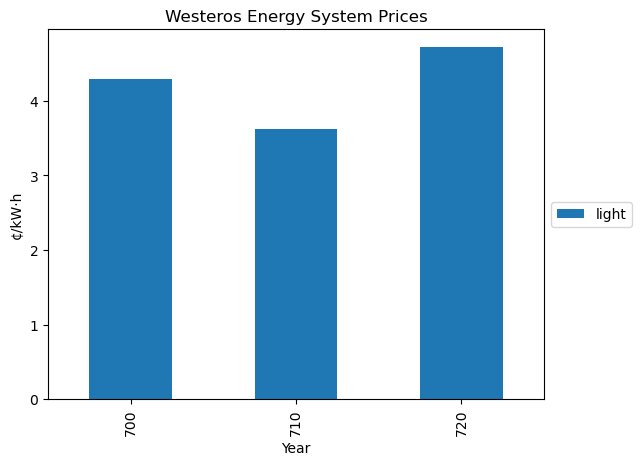

In [35]:
rep.set_filters(t=None, c=["light"])
rep.get("plot prices")

In [47]:
tax_emission = make_df(
    "tax_emission",
    node="Westeros",
    type_year=[700, 710, 720],
    type_tec="all",
    unit="USD/tCO2",
    type_emission="GHG",
    value=[0,0,scen_bd_by_year.var("PRICE_EMISSION").lvl],
)
scen_tax.add_par("tax_emission", tax_emission)
scen_tax.par("tax_emission")

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:995: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "value"] = item.getValues(jList)[:]


,node,type_emission,type_tec,type_year,value,unit
0,Westeros,GHG,all,700,0.000000,USD/tCO2
1,Westeros,GHG,all,710,0.000000,USD/tCO2
2,Westeros,GHG,all,720,42.541293,USD/tCO2


In [48]:
scen_tax.commit(comment="setting taxes on emissions from the scenario with yearly bounds on emissions")

In [49]:
scen_tax.solve()

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:995: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "value"] = item.getValues(jList)[:]


In [50]:
scen_tax.var("OBJ")["lvl"]

278201.15625

In [51]:
scen_tax.var("EMISS",{"node":"Westeros"})

C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:998: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "lvl"] = item.getLevels(jList)[:]
C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:999: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "mrg"] = item.getMarginals(jList)[:]


,node,emission,type_tec,year,lvl,mrg
0,Westeros,CO2,all,700,350.569757,0.0
1,Westeros,CO2,all,710,425.562957,0.0
2,Westeros,CO2,all,720,210.153017,0.0


C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:998: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "lvl"] = item.getLevels(jList)[:]
C:\Users\ggungor\Miniconda3\envs\message_env\lib\site-packages\ixmp\backend\jdbc.py:999: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, "mrg"] = item.getMarginals(jList)[:]


<AxesSubplot: title={'center': 'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

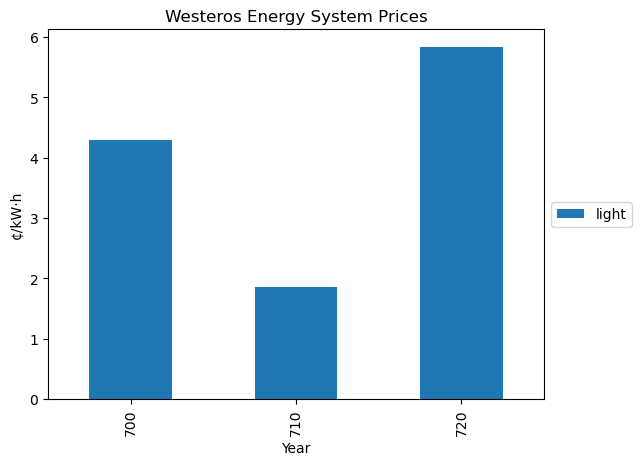

In [54]:
rep.set_filters(t=None, c=["light"])
rep.get("plot prices")

## Close the connection to the database

In [55]:
mp.close_db()